In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [277]:
df = pd.read_csv('../../stacked_inner_pollution_data.csv')

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,5,6,7,8,10,11,14,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [278]:
df.head()

,Date,Time,Location,Carbon monoxide,Nitric Oxide,Nitrogen dioxide,Non-volatile PM10,Non-volatile PM2.5,Oxides of Nitrogen,Ozone,...,Status.2,Status.3,Status.4,Status.5,Status.6,Status.7,Status.8,Status.9,Sulphur dioxide,Volatile PM10
0,2004-01-01,01:00:00,Ealing - Acton Town Hall,0.81494,NaN,35.19,NaN,NaN,NaN,NaN,...,V mgm-3,V ugm-3 (VCM),V ugm-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-01-01,01:00:00,Ealing - Ealing Town Hall,NaN,NaN,18.5512,NaN,NaN,NaN,39.91400,...,V ugm-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.10277,NaN
2,2004-01-01,01:00:00,Ealing - Hanger Lane Gyratory,NaN,NaN,46.8563,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-01-01,02:00:00,Ealing - Acton Town Hall,0.93136,NaN,17.595,NaN,NaN,NaN,NaN,...,V mgm-3,V ugm-3 (VCM),V ugm-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-01-01,02:00:00,Ealing - Ealing Town Hall,NaN,NaN,11.0925,NaN,NaN,NaN,54.48261,...,V ugm-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.10277,NaN


## Units

PM10 Particulae Matter  --->   R ugm-3 (INDIC.GRAV)

Nitric Oxide  ---> R ugm-3

Nitrogen Dioxide ---> R ugm-3

Oxides of Nitrogen ---> R ugm-3

Sulpher Dioxide ---> R ugm-3

Non-volatile PM10 ---> R ugm-3 (INDIC.GRAV)

Non-volatile PM2.5 ---> R ugm-3

Ozone ---> R ugm-3

### Dropping units columns

In [279]:
unit_cols = [c for c in df.columns if "Status" in c]

In [280]:
df = df.drop(columns = unit_cols)

In [281]:
df['Date'] = pd.to_datetime(df['Date'])

In [282]:
cols = df.columns.drop(['Date', 'Time', 'Location'])
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [283]:
df.dtypes

Date                                          datetime64[ns]
Time                                                  object
Location                                              object
Carbon monoxide                                      float64
Nitric Oxide                                         float64
Nitrogen dioxide                                     float64
Non-volatile PM10                                    float64
Non-volatile PM2.5                                   float64
Oxides of Nitrogen                                   float64
Ozone                                                float64
PM1 Particulates                                     float64
PM10 Particulate matter                              float64
PM10 particulate matter (Hourly measured)            float64
PM2.5 Particulate matter                             float64
PM2.5 Particulate matter.1                           float64
PM2.5 particulate matter (Hourly measured)           float64
Sulphur dioxide         

In [284]:
df_hourly = df.copy()

In [285]:
df_daily = df_hourly.groupby(['Date', 'Location']).mean().reset_index()

In [286]:
df_daily.head()

,Date,Location,Carbon monoxide,Nitric Oxide,Nitrogen dioxide,Non-volatile PM10,Non-volatile PM2.5,Oxides of Nitrogen,Ozone,PM1 Particulates,PM10 Particulate matter,PM10 particulate matter (Hourly measured),PM2.5 Particulate matter,PM2.5 Particulate matter.1,PM2.5 particulate matter (Hourly measured),Sulphur dioxide,Volatile PM10
0,2004-01-01,Hounslow 2 - Cranford,NaN,4.130435,22.652174,NaN,NaN,28.565217,NaN,NaN,10.208333,NaN,NaN,NaN,NaN,1.000000,NaN
1,2004-01-01,Hounslow 4 - Chiswick High Road,NaN,27.666667,47.875000,NaN,NaN,90.250000,NaN,NaN,21.416667,NaN,NaN,NaN,NaN,1.583333,NaN
2,2004-01-01,Hounslow Brentford,0.558333,25.541667,25.916667,NaN,NaN,65.083333,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-01-01,Ealing - Acton Town Hall,0.834343,NaN,38.106562,NaN,NaN,NaN,NaN,NaN,NaN,22.454167,NaN,NaN,8.258333,NaN,NaN
4,2004-01-01,Ealing - Ealing Town Hall,NaN,NaN,25.747031,NaN,NaN,NaN,37.01192,NaN,NaN,NaN,NaN,NaN,NaN,13.304500,NaN


In [287]:
df_daily.columns

Index(['Date', 'Location', 'Carbon monoxide', 'Nitric Oxide',
       'Nitrogen dioxide', 'Non-volatile PM10', 'Non-volatile PM2.5',
       'Oxides of Nitrogen', 'Ozone', 'PM1 Particulates',
       'PM10 Particulate matter', 'PM10 particulate matter (Hourly measured)',
       'PM2.5 Particulate matter', 'PM2.5 Particulate matter.1',
       'PM2.5 particulate matter (Hourly measured)', 'Sulphur dioxide',
       'Volatile PM10'],
      dtype='object')

In [288]:
pollutants = ['Carbon monoxide', 'Nitric Oxide',
       'Nitrogen dioxide', 'Non-volatile PM10', 'Non-volatile PM2.5',
       'Oxides of Nitrogen', 'Ozone', 'PM1 Particulates',
       'PM10 Particulate matter', 'PM10 particulate matter (Hourly measured)',
       'PM2.5 Particulate matter', 'PM2.5 Particulate matter.1',
       'PM2.5 particulate matter (Hourly measured)', 'Sulphur dioxide',
       'Volatile PM10']

In [12]:
# pollutants = ['Carbon monoxide', 'Ozone',
#        'PM10 particulate matter (Hourly measured)', 'PM2.5 Particulate matter',
#        'PM2.5 particulate matter (Hourly measured)', 'Sulphur dioxide',
#        'Volatile PM10', ]

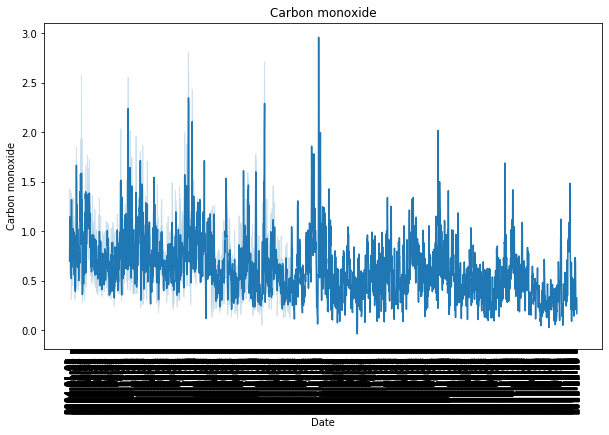

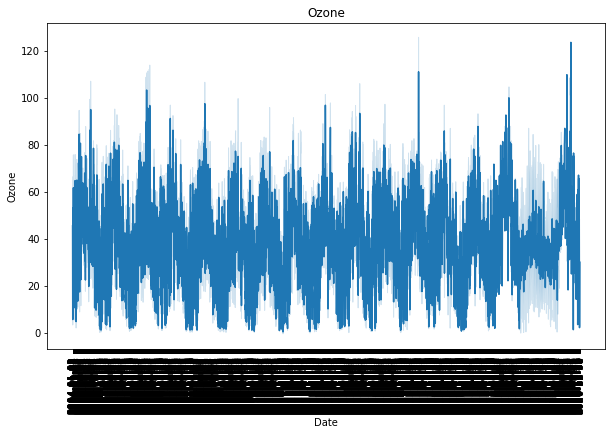

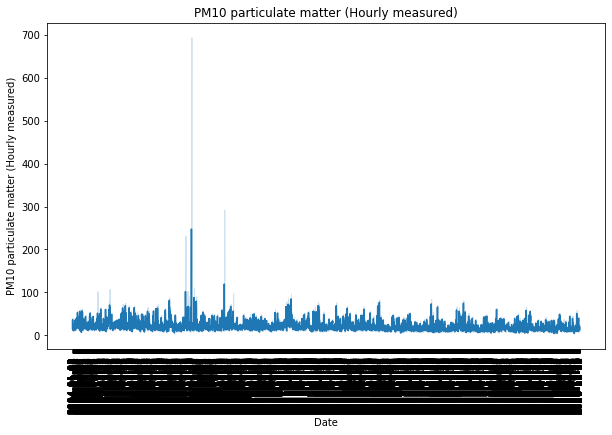

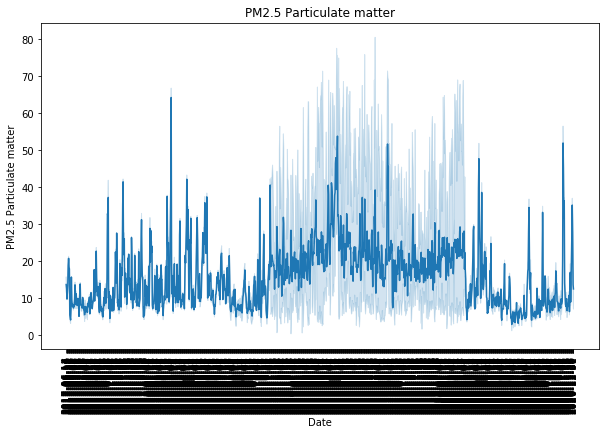

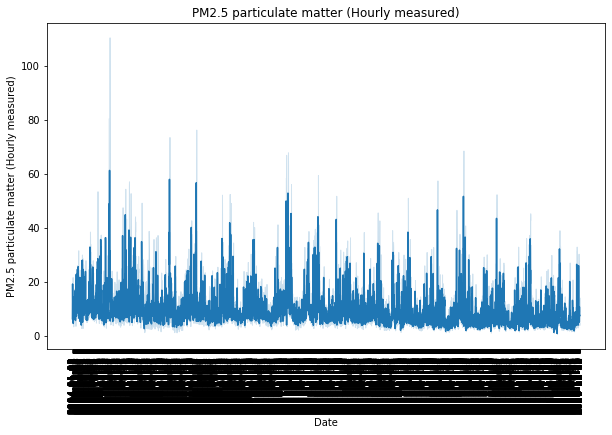

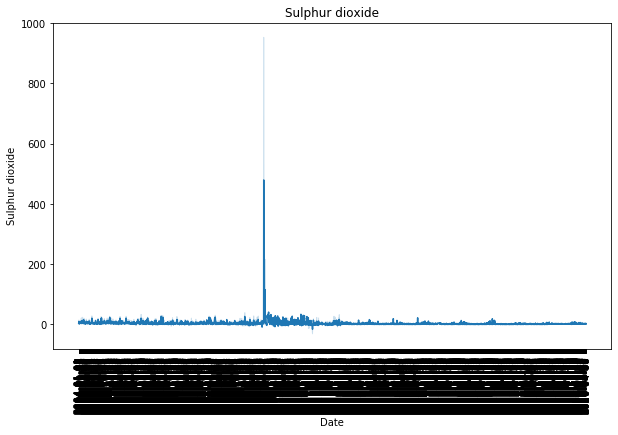

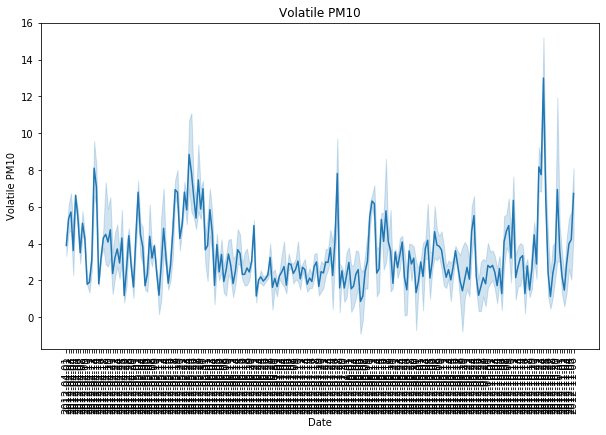

In [30]:
for p in pollutants:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p ,
                 x='Date',
                 data=df_daily).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

In [289]:
df_monthly = df_daily.groupby(['Location', pd.Grouper(key='Date', freq='M')]).mean().reset_index()
df_quaterly = df_daily.groupby(['Location', pd.Grouper(key='Date', freq='Q')]).mean().reset_index()
df_yearly = df_daily.groupby(['Location', pd.Grouper(key='Date', freq='Y')]).mean().reset_index()
df_yearly.head()

,Location,Date,Carbon monoxide,Nitric Oxide,Nitrogen dioxide,Non-volatile PM10,Non-volatile PM2.5,Oxides of Nitrogen,Ozone,PM1 Particulates,PM10 Particulate matter,PM10 particulate matter (Hourly measured),PM2.5 Particulate matter,PM2.5 Particulate matter.1,PM2.5 particulate matter (Hourly measured),Sulphur dioxide,Volatile PM10
0,Hounslow 2 - Cranford,2004-12-31,NaN,19.366907,35.637110,NaN,NaN,65.183649,31.628426,NaN,22.091612,NaN,NaN,NaN,NaN,3.611565,NaN
1,Hounslow 2 - Cranford,2005-12-31,NaN,19.282252,37.730687,NaN,NaN,66.993132,34.426010,NaN,22.159977,NaN,NaN,NaN,NaN,3.959997,NaN
2,Hounslow 2 - Cranford,2006-12-31,NaN,16.322724,37.439653,NaN,NaN,62.493307,41.626836,NaN,22.695308,NaN,NaN,NaN,NaN,3.018580,NaN
3,Hounslow 2 - Cranford,2007-12-31,NaN,22.751626,34.516199,NaN,NaN,69.260681,31.764437,NaN,21.877800,NaN,NaN,NaN,NaN,2.886371,NaN
4,Hounslow 2 - Cranford,2008-12-31,NaN,19.463412,36.025263,NaN,NaN,65.728967,36.527434,NaN,19.221030,NaN,NaN,NaN,NaN,3.046298,NaN


### Monthly pollution levels from 2004 - 2020

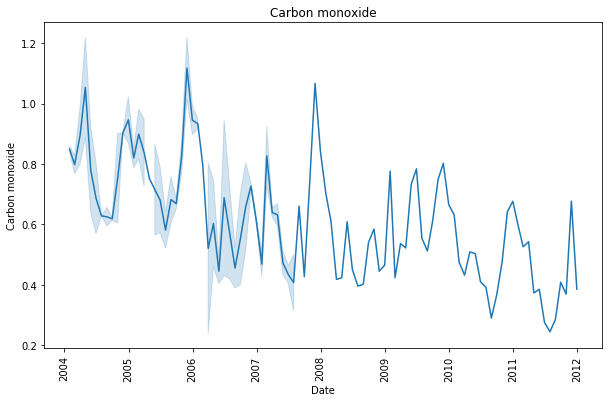

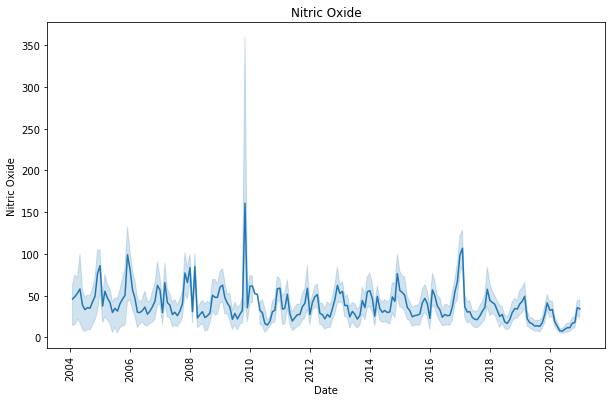

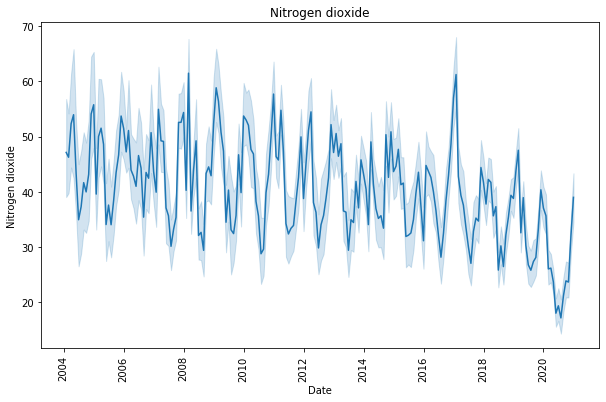

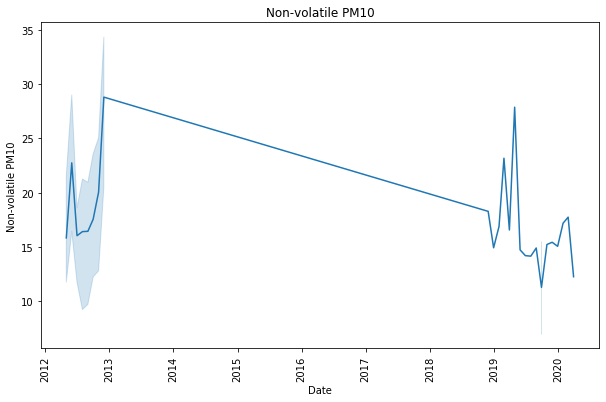

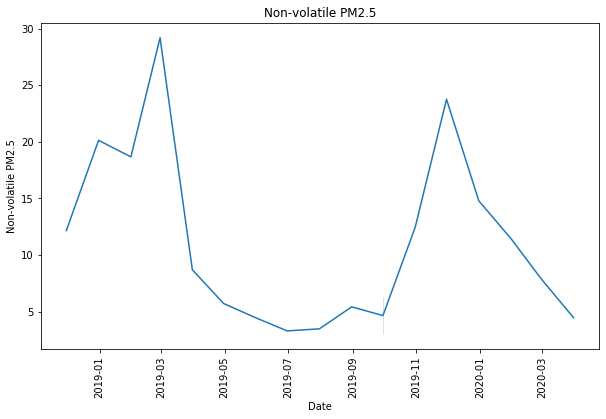

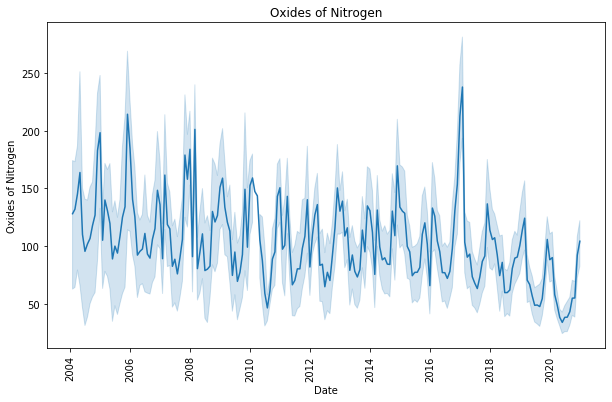

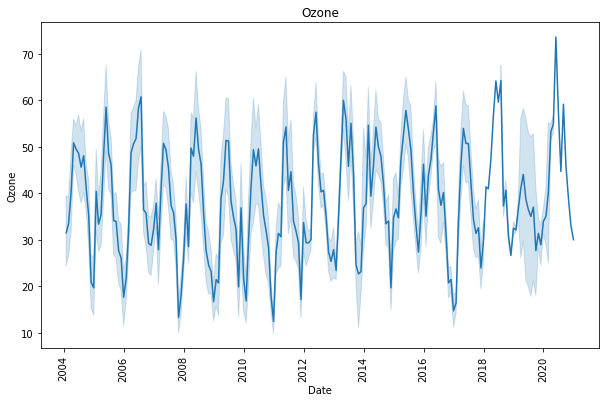

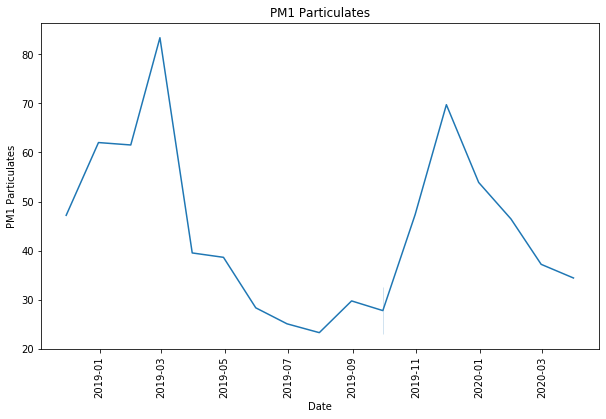

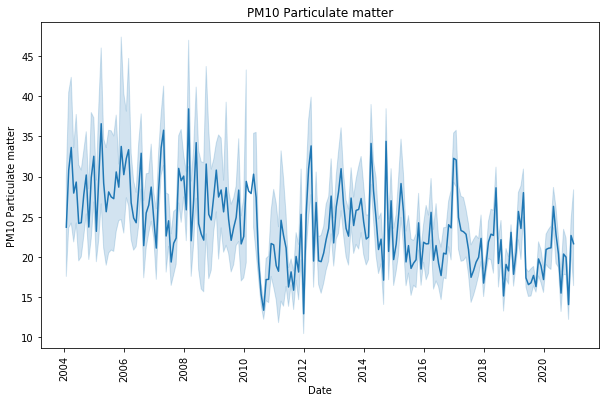

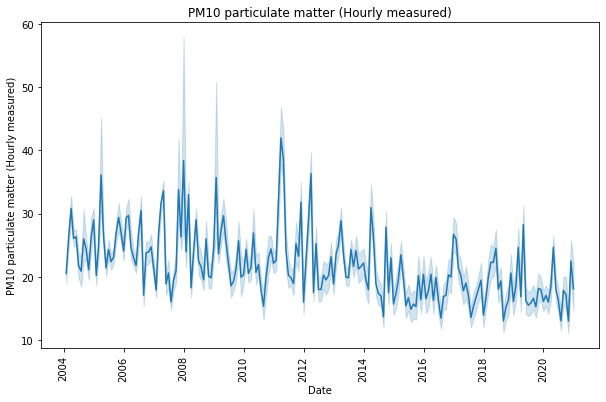

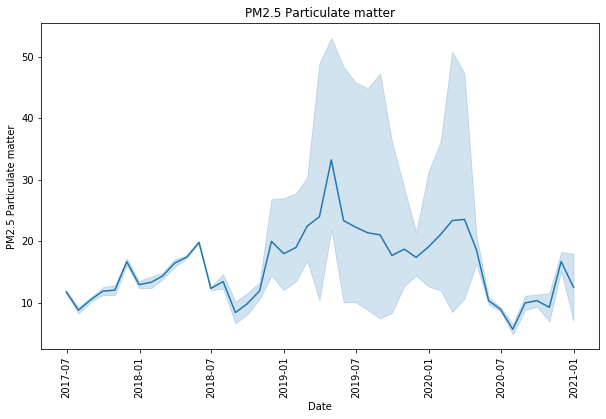

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1371: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


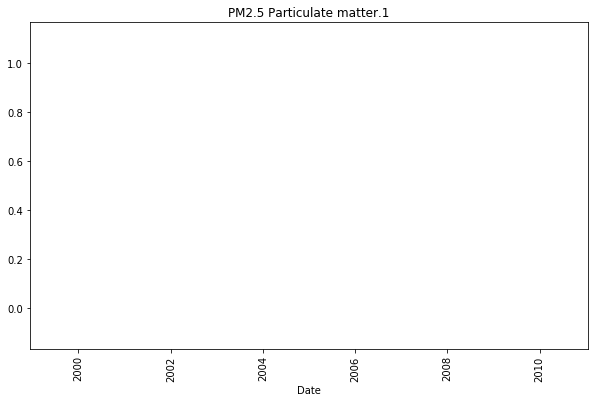

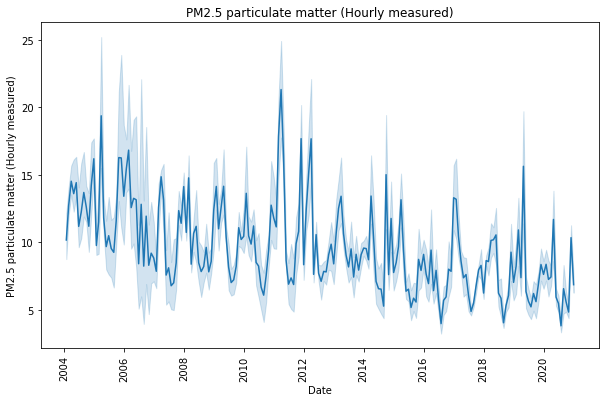

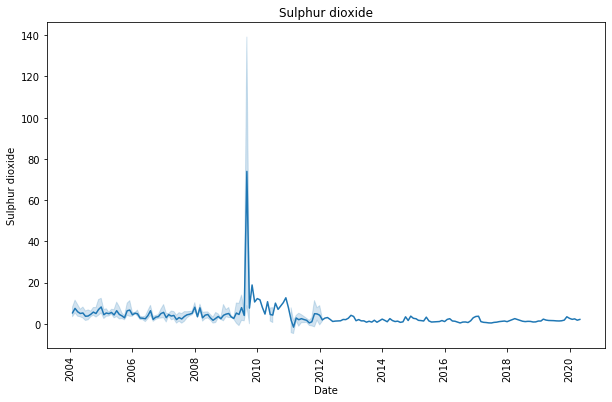

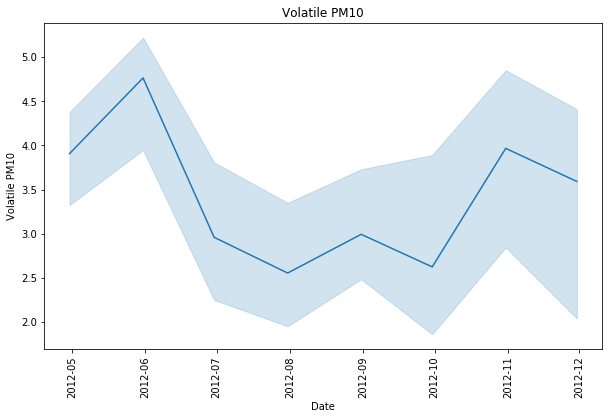

In [169]:
for p in pollutants:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p ,
                 x='Date',
                 data=df_monthly).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

### Yearly pollution levels from 2004 - 2020

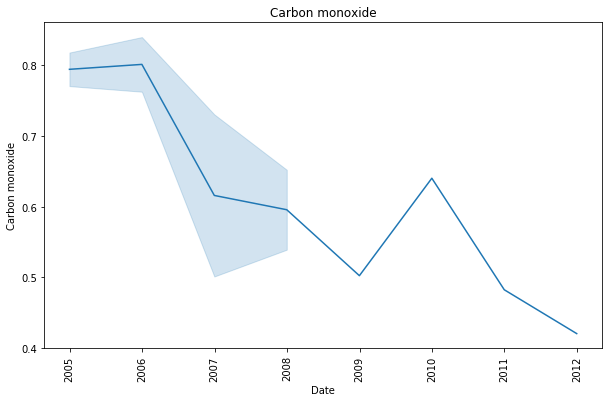

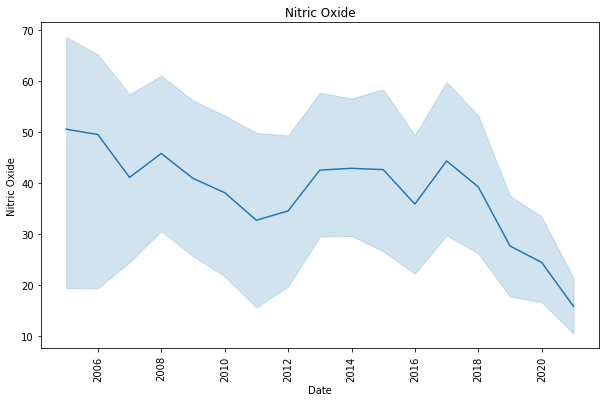

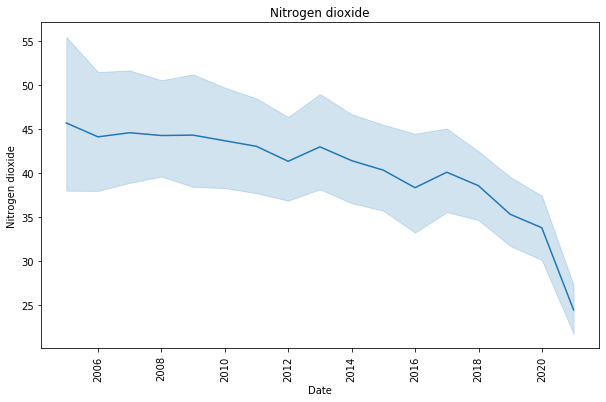

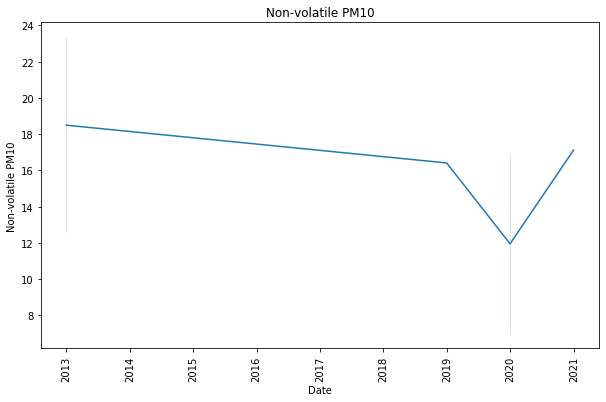

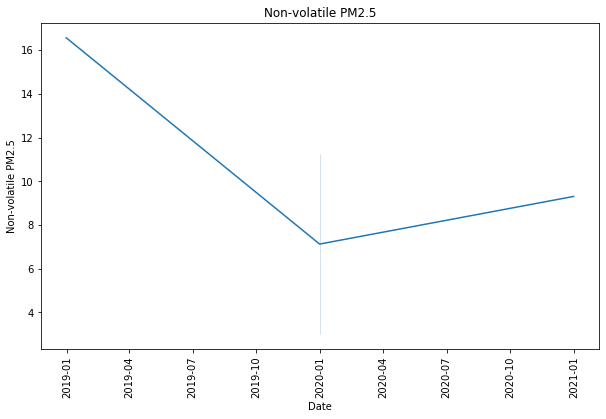

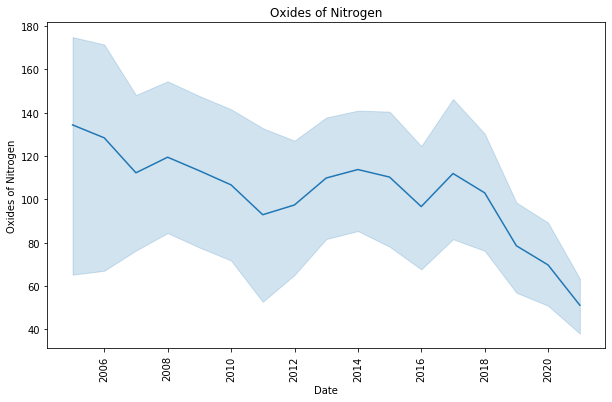

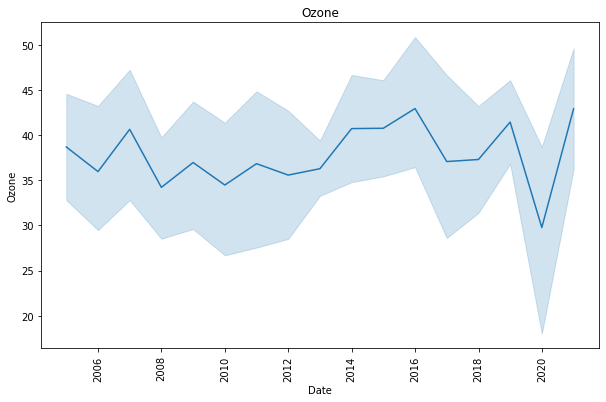

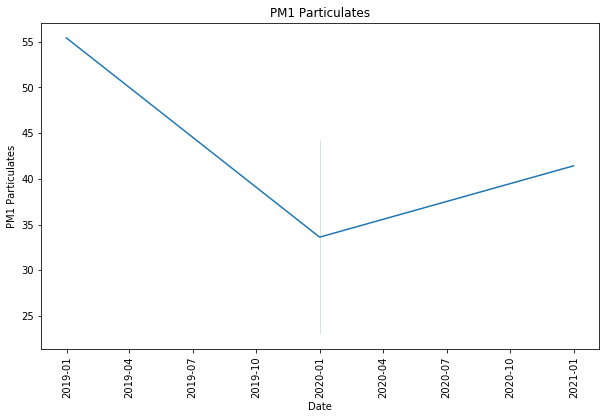

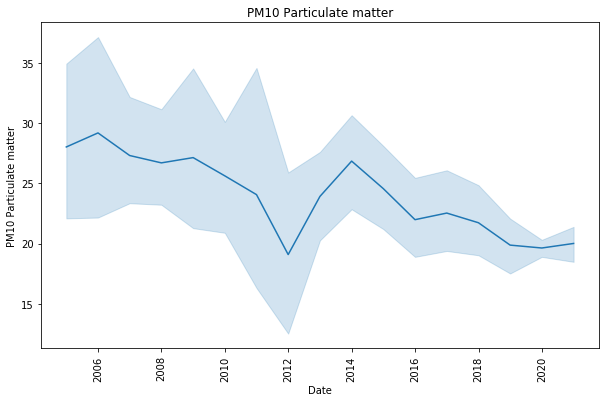

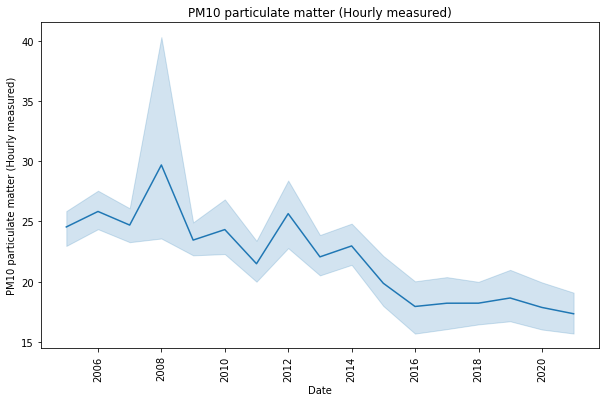

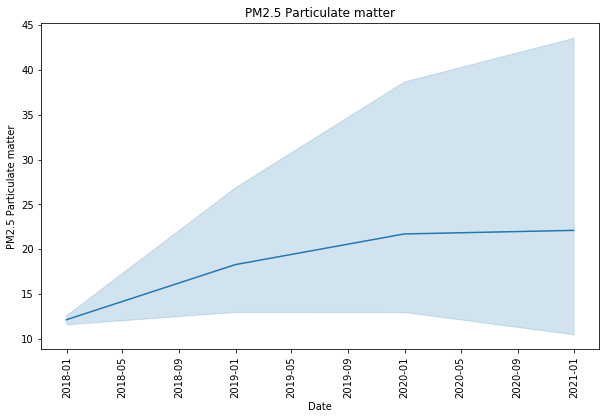

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1371: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


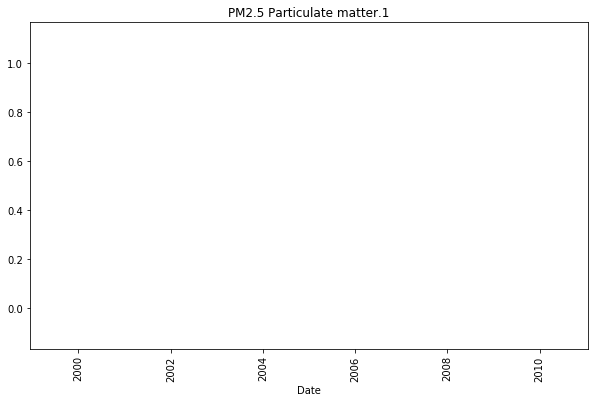

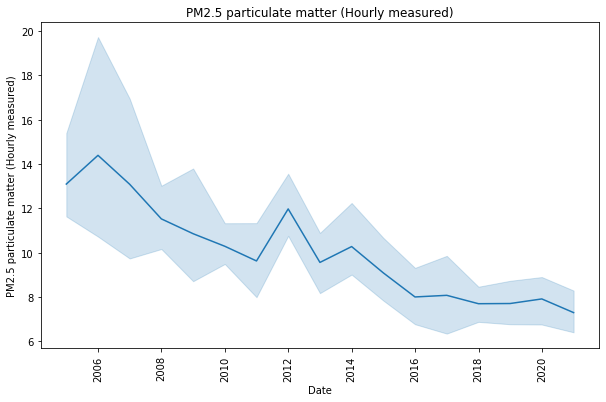

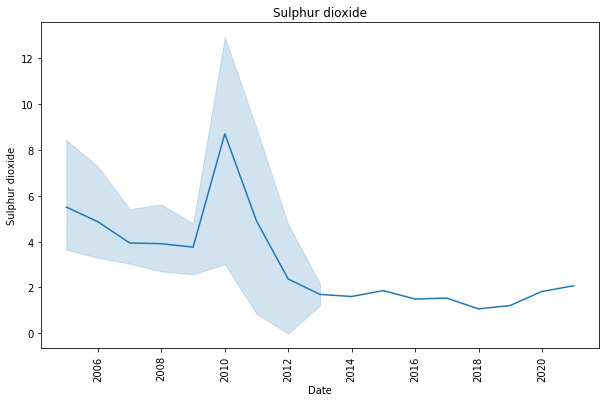

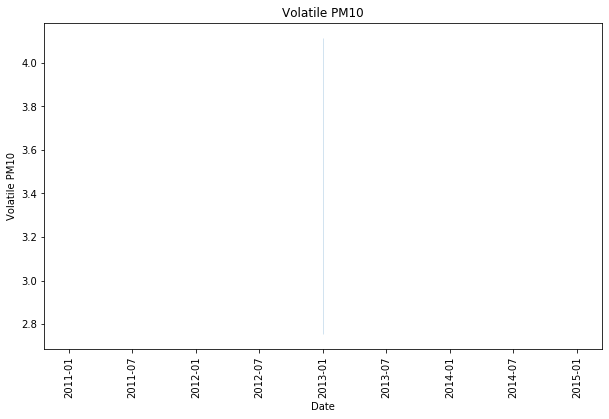

In [170]:
for p in pollutants:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p ,
                 x='Date',
                 data=df_yearly).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

### Dropping Pullutants with limited data

In [290]:
df_monthly = df_monthly.drop(['Non-volatile PM10', 
                            'Non-volatile PM2.5', 
                            'PM1 Particulates', 
                            'PM2.5 Particulate matter',
                            'PM2.5 Particulate matter.1',
                            'Volatile PM10'], axis = 1)
df_quaterly = df_quaterly.drop(['Non-volatile PM10', 
                            'Non-volatile PM2.5', 
                            'PM1 Particulates', 
                            'PM2.5 Particulate matter',
                            'PM2.5 Particulate matter.1',
                            'Volatile PM10'], axis = 1)

In [291]:
df_yearly = df_yearly.drop(['Non-volatile PM10', 
                            'Non-volatile PM2.5', 
                            'PM1 Particulates', 
                            'PM2.5 Particulate matter',
                            'PM2.5 Particulate matter.1',
                            'Volatile PM10'], axis = 1)
df_yearly.head()

,Location,Date,Carbon monoxide,Nitric Oxide,Nitrogen dioxide,Oxides of Nitrogen,Ozone,PM10 Particulate matter,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Sulphur dioxide
0,Hounslow 2 - Cranford,2004-12-31,NaN,19.366907,35.637110,65.183649,31.628426,22.091612,NaN,NaN,3.611565
1,Hounslow 2 - Cranford,2005-12-31,NaN,19.282252,37.730687,66.993132,34.426010,22.159977,NaN,NaN,3.959997
2,Hounslow 2 - Cranford,2006-12-31,NaN,16.322724,37.439653,62.493307,41.626836,22.695308,NaN,NaN,3.018580
3,Hounslow 2 - Cranford,2007-12-31,NaN,22.751626,34.516199,69.260681,31.764437,21.877800,NaN,NaN,2.886371
4,Hounslow 2 - Cranford,2008-12-31,NaN,19.463412,36.025263,65.728967,36.527434,19.221030,NaN,NaN,3.046298


In [292]:
df_yearly.to_csv("inner_yearly_agg.csv")

### Melting Pollutants into a single column

In [176]:
boroughs = ['Heathrow', 'Ealing', 'Heathrow', 'Hillingdon', 'Richmond', 'Slough', 'Teddington']

In [180]:
poll_vars = df_monthly[['Location', 'Date']]
melted_monthly = pd.melt(df_monthly, id_vars=list(poll_vars.columns), value_vars = list(df_monthly.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R ugm-3)')
melted_quaterly = pd.melt(df_quaterly, id_vars=list(poll_vars.columns), value_vars = list(df_quaterly.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R ugm-3)')
melted_yearly = pd.melt(df_yearly, id_vars=list(poll_vars.columns), value_vars = list(df_yearly.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R ugm-3)')
melted_yearly.head()

,Location,Date,Pollutant,Indicator Value (R ugm-3)
0,Hounslow 2 - Cranford,2004-12-31,Carbon monoxide,NaN
1,Hounslow 2 - Cranford,2005-12-31,Carbon monoxide,NaN
2,Hounslow 2 - Cranford,2006-12-31,Carbon monoxide,NaN
3,Hounslow 2 - Cranford,2007-12-31,Carbon monoxide,NaN
4,Hounslow 2 - Cranford,2008-12-31,Carbon monoxide,NaN


In [183]:
melted_yearly.Location.unique()

array([' Hounslow 2 - Cranford', ' Hounslow 4 - Chiswick High Road',
       ' Hounslow Brentford', ' Hounslow Feltham',
       ' Hounslow Gunnersbury', ' Hounslow Hatton Cross',
       ' Hounslow Heston Road', 'Ealing - Acton Town Hall',
       'Ealing - Acton Town Hall (Partisol)',
       'Ealing - Acton Town Hall FDMS', 'Ealing - Acton Vale ',
       'Ealing - Court Way', 'Ealing - Ealing Town Hall',
       'Ealing - Greenford', 'Ealing - Hanger Lane Gyratory',
       'Ealing - Southall', 'Ealing - Southall FDMS',
       'Ealing - Southall Railway', 'Ealing - Western Avenue',
       'Heathrow Bath Road', 'Heathrow Green Gates', 'Heathrow LHR2',
       'Heathrow Oaks Road', 'Hillingdon 2 - Hillingdon Hospital',
       'Hillingdon Harmondsworth', 'Hillingdon Harmondsworth Osiris',
       'Hillingdon Hayes', 'Hillingdon Oxford Avenue',
       'Hillingdon Sipson', 'Hillingdon South Ruislip',
       'Hounslow Boston Manor Park',
       'National Physical Laboratory, Teddington',
       'R

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


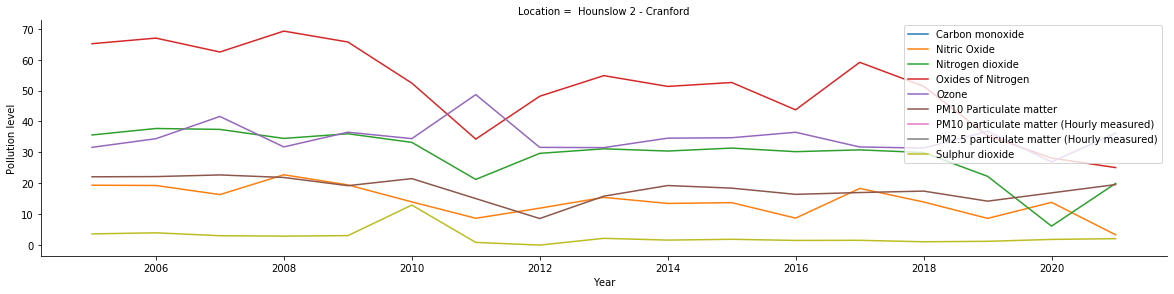

In [199]:
g = sns.FacetGrid(melted_yearly[melted_yearly['Location'] == ' Hounslow 2 - Cranford'], col="Location", col_wrap=2, size=4, aspect=4)

g.map_dataframe(sns.lineplot, x = 'Date', y = 'Indicator Value (R ugm-3)', hue = 'Pollutant')

            
g.set_axis_labels("Year", "Pollution level") 

plt.legend()
plt.show()

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


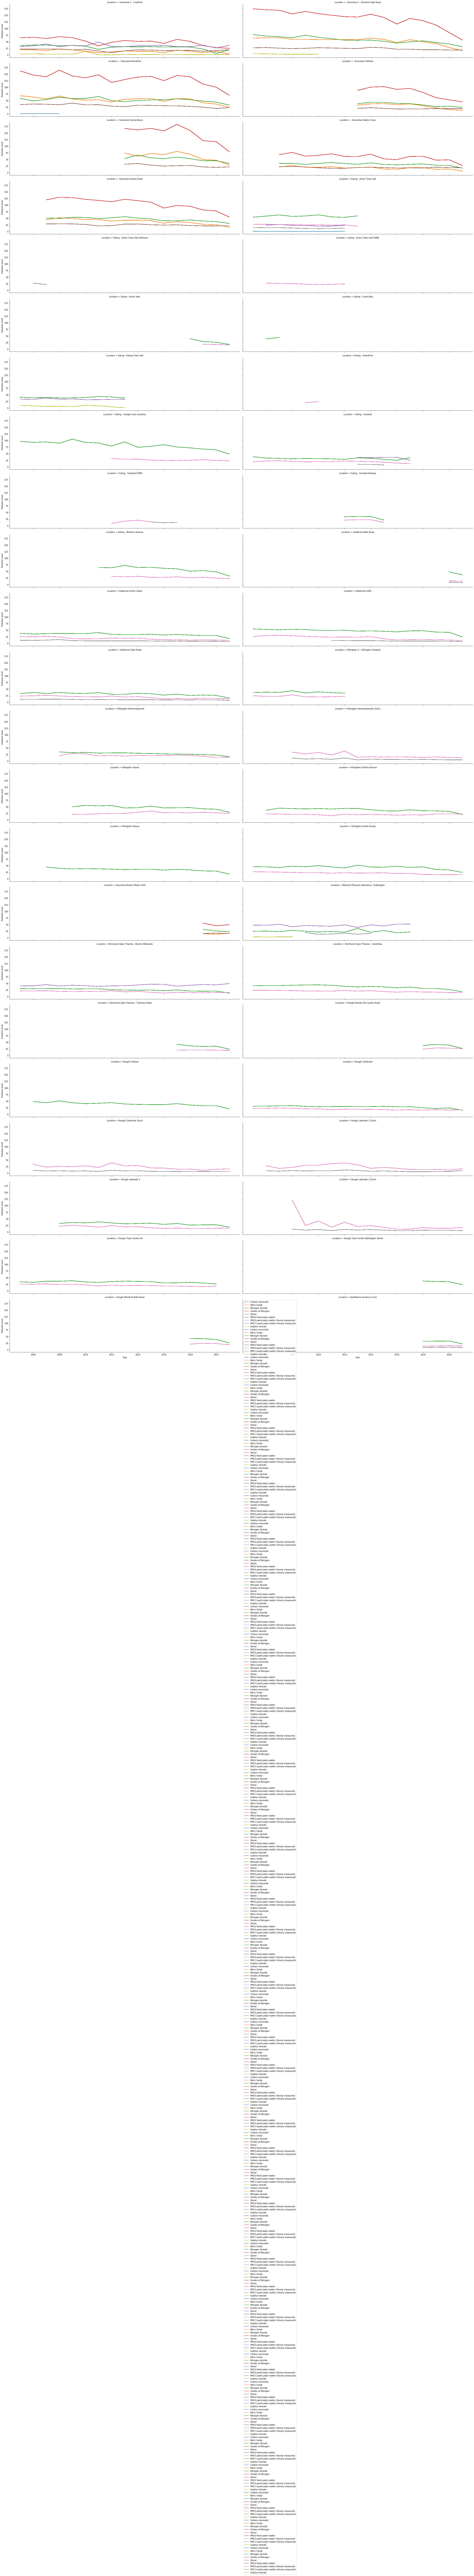

In [200]:
g = sns.FacetGrid(melted_yearly, col="Location", col_wrap=2, size=4, aspect=4)

for location in melted_yearly.Location.unique():
        g.map_dataframe(sns.lineplot, x = 'Date', y = 'Indicator Value (R ugm-3)', hue = 'Pollutant')

            
g.set_axis_labels("Year", "Pollution level") 
plt.legend()
plt.show()

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


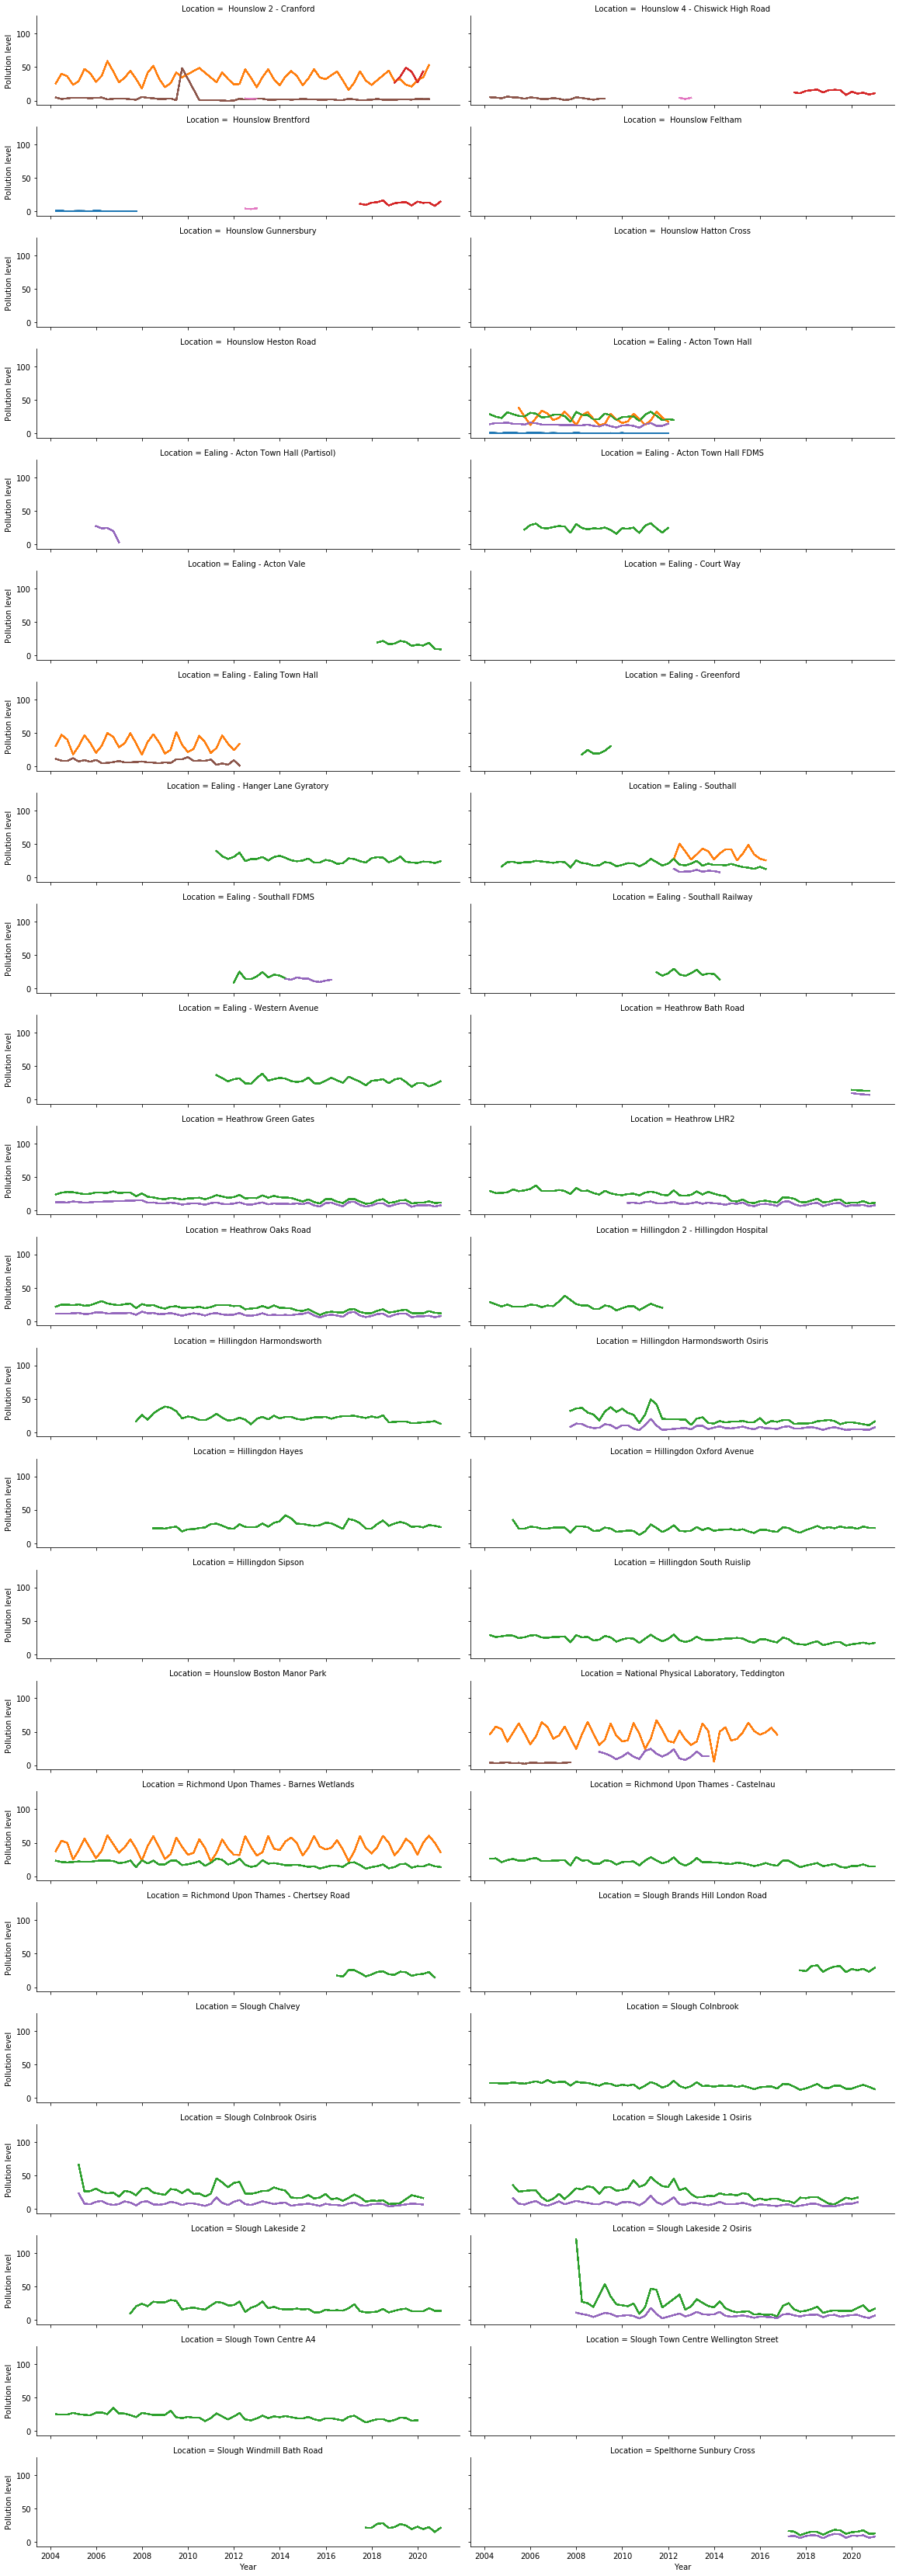

In [116]:
g = sns.FacetGrid(melted_quaterly, col="Location", col_wrap=2, size=2, aspect=4)

for location in melted_quaterly.Location.unique():
        g.map_dataframe(sns.lineplot, x = 'Date', y = 'Indicator Value (R ugm-3)', hue = 'Pollutant')

            
g.set_axis_labels("Year", "Pollution level") 
plt.show()

In [108]:
df_yearly.head()

,Location,Date,Carbon monoxide,Ozone,PM10 particulate matter (Hourly measured),PM2.5 Particulate matter,PM2.5 particulate matter (Hourly measured),Sulphur dioxide,Volatile PM10
0,Hounslow 2 - Cranford,2004-12-31,NaN,31.628426,NaN,NaN,NaN,3.611565,NaN
1,Hounslow 2 - Cranford,2005-12-31,NaN,34.426010,NaN,NaN,NaN,3.959997,NaN
2,Hounslow 2 - Cranford,2006-12-31,NaN,41.626836,NaN,NaN,NaN,3.018580,NaN
3,Hounslow 2 - Cranford,2007-12-31,NaN,31.764437,NaN,NaN,NaN,2.886371,NaN
4,Hounslow 2 - Cranford,2008-12-31,NaN,36.527434,NaN,NaN,NaN,3.046298,NaN


In [205]:
len(list(df_yearly.Location.unique()))

46

In [204]:
CCG = {'Hillingdon':['Hillingdon 2 - Hillingdon Hospital',
                     'Hillingdon Harmondsworth',
                     'Hillingdon Harmondsworth Osiris',
                     'Hillingdon Hayes',
                     'Hillingdon Oxford Avenue',
                     'Hillingdon Sipson',
                     'Hillingdon South Ruislip', 
                     'Heathrow LHR2', 
                     'Heathrow Bath Road', 
                     'Heathrow Green Gates'],
       'East Berkshire':['Slough Brands Hill London Road',
                         'Slough Chalvey', 
                         'Slough Colnbrook',
                         'Slough Colnbrook Osiris',
                         'Slough Lakeside 1 Osiris',
                         'Slough Lakeside 2',
                         'Slough Lakeside 2 Osiris',
                         'Slough Town Centre A4',
                         'Slough Town Centre Wellington Street',
                         'Slough Windmill Bath Road'],
       'Hounslow': [' Hounslow 2 - Cranford',
                    ' Hounslow 4 - Chiswick High Road',
                    ' Hounslow Brentford',
                    ' Hounslow Feltham',
                    ' Hounslow Gunnersbury',
                    ' Hounslow Hatton Cross',
                    ' Hounslow Heston Road',
                    'Hounslow Boston Manor Park'],
       'Ealing':['Ealing - Acton Town Hall',
                 'Ealing - Acton Town Hall (Partisol)',
                 'Ealing - Acton Town Hall FDMS',
                 'Ealing - Acton Vale ',
                 'Ealing - Court Way',
                 'Ealing - Ealing Town Hall',
                 'Ealing - Greenford',
                 'Ealing - Hanger Lane Gyratory',
                 'Ealing - Southall',
                 'Ealing - Southall FDMS',
                 'Ealing - Southall Railway',
                 'Ealing - Western Avenue'],
       'Surrey Heartlands': ['Spelthorne Sunbury Cross','Heathrow Oaks Road'],
       'South West London': ['Richmond Upon Thames - Barnes Wetlands',
                             'Richmond Upon Thames - Castelnau',
                             'Richmond Upon Thames - Chertsey Road',
                             'National Physical Laboratory, Teddington']} 

In [209]:
sum([len(x) for x in CCG.values()])

46

In [210]:
yearly = df_yearly.copy()

In [270]:
yearly['CCG'] = (key for key, value in CCG.items() for v in value for loc in yearly.Location.unique() if v == loc)

In [272]:
for key, value in CCG.items():
    for v in value:
        for l in yearly.Location.unique():
            if v == l:
                yearly.CCG = key

In [273]:
yearly

,Location,Date,Carbon monoxide,Nitric Oxide,Nitrogen dioxide,Oxides of Nitrogen,Ozone,PM10 Particulate matter,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Sulphur dioxide,CCG
0,Hounslow 2 - Cranford,2004-12-31,NaN,19.366907,35.637110,65.183649,31.628426,22.091612,NaN,NaN,3.611565,South West London
1,Hounslow 2 - Cranford,2005-12-31,NaN,19.282252,37.730687,66.993132,34.426010,22.159977,NaN,NaN,3.959997,South West London
2,Hounslow 2 - Cranford,2006-12-31,NaN,16.322724,37.439653,62.493307,41.626836,22.695308,NaN,NaN,3.018580,South West London
3,Hounslow 2 - Cranford,2007-12-31,NaN,22.751626,34.516199,69.260681,31.764437,21.877800,NaN,NaN,2.886371,South West London
4,Hounslow 2 - Cranford,2008-12-31,NaN,19.463412,36.025263,65.728967,36.527434,19.221030,NaN,NaN,3.046298,South West London
...,...,...,...,...,...,...,...,...,...,...,...,...
511,Slough Windmill Bath Road,2020-12-31,NaN,NaN,26.305092,NaN,NaN,NaN,19.388016,NaN,NaN,South West London
512,Spelthorne Sunbury Cross,2017-12-31,NaN,NaN,32.394163,NaN,NaN,NaN,13.263787,8.127426,NaN,South West London
513,Spelthorne Sunbury Cross,2018-12-31,NaN,NaN,32.674996,NaN,NaN,NaN,14.449202,9.126825,NaN,South West London
514,Spelthorne Sunbury Cross,2019-12-31,NaN,NaN,33.062556,NaN,NaN,NaN,15.709636,9.868664,NaN,South West London


In [ ]:
df.apply(lambda x: dict_of_dicts[x.col1][x.col2], axis=1)